In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from src.models import Model

DATA_FOLDER = 'data/'

/opt/miniconda3/envs/ml_project_2/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Training model: 100%|██████████| 100000/100000 [01:04<00:00, 1547.19 epoch/s]


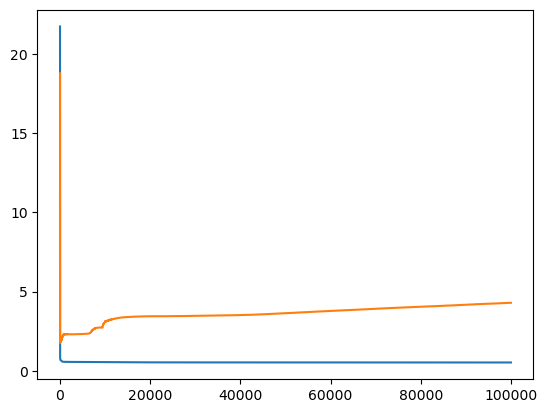

In [4]:
model = Model(nb_lags=6, lr=1e-2)

######################### Load training data: #########################
train_input, train_target = torch.load(DATA_FOLDER + 'train_data.pkl')
train_input, train_target = train_input.to(model.device), train_target.to(model.device)

######################### Load validation data: #########################
val_input, val_target = torch.load(DATA_FOLDER + 'val_data.pkl')
val_input, val_target = val_input.to(model.device), val_target.to(model.device)

# Standardize:
mean = train_target.mean().item()
std = train_target.std().item()
min_ = train_target.min()
max_ = train_target.max()

train_input = (train_input-mean)/std
# train_target = (train_target-mean)/std
val_input = (val_input-mean)/std
# val_target = (val_target-mean)/std

#train_input = (train_input-min_)/(max_-min_)
#train_target = (train_target-min_)/(max_-min_)
#val_input = (val_input-min_)/(max_-min_)
#val_target = (val_target-min_)/(max_-min_)


######################### Training: #########################
train = True
if train:
    model.train(train_input, train_target, num_epochs=100000, val_input=val_input, val_target=val_target)
    torch.save(model, 'models/bestmodel.pth')

######################### Validation: #########################
model = torch.load('models/bestmodel.pth')
model.test(val_input, val_target)

######################### Plot training loss: #########################
plt.plot(model.train_losses)
plt.plot(model.val_losses)
plt.show()

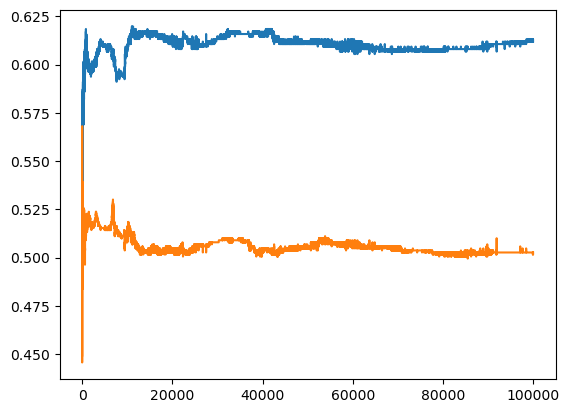

In [5]:
plt.plot(model.train_hit_rates)
plt.plot(model.val_hit_rates)

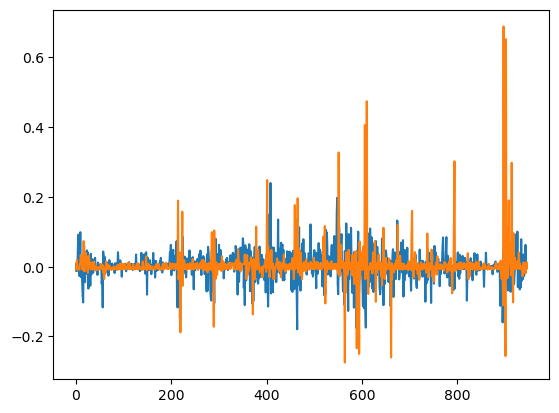

In [6]:
plt.plot(val_target.to('cpu'))
plt.plot(model(val_input).to('cpu').detach())
plt.show()

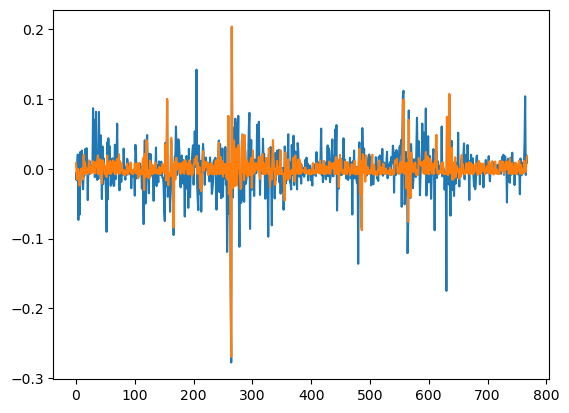

In [7]:
plt.plot(train_target.to('cpu'))
plt.plot(model(train_input).to('cpu').detach())
plt.show()

Training model: 100%|██████████| 50/50 [00:00<00:00, 2676.82 epoch/s]


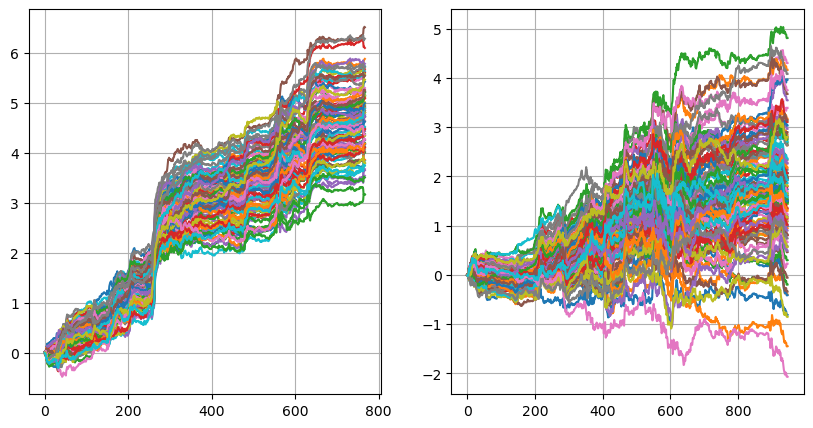

0.5145300954580307
-0.6923193867064871
0.7968990288037183


In [8]:
avg_hit_rate = 0
avg_max_dd = 0
avg_sharpe = 0
nb_model = 100

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

for i in range(nb_model):
    model = Model(nb_lags=6, lr=1e-1)
    model.train(train_input, train_target, num_epochs=50)
    
    model.test(train_input, train_target)
    ax1.plot(np.cumsum(model.log_returns))
    ax1.grid(True)
    
    model.test(val_input, val_target)
    ax2.plot(np.cumsum(model.log_returns))
    ax2.grid(True)
    
    avg_hit_rate += model.hit_rate
    avg_max_dd += model.max_dd
    avg_sharpe += model.sharpe


plt.grid(True)
plt.show()

avg_hit_rate = avg_hit_rate / nb_model
avg_max_dd = avg_max_dd / nb_model
avg_sharpe = avg_sharpe / nb_model

print(avg_hit_rate)
print(avg_max_dd)
print(avg_sharpe)